<a href="https://colab.research.google.com/github/mossytreesandferns/DataCampHomework/blob/master/DCAnalyzingPoliceData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/DCAnalyzingPoliceActivity/")
os.getcwd()

'/content/gdrive/My Drive/DCAnalyzingPoliceActivity'

# Preparing Data for Analysis
### Stanford Open Policing Project
full data set: https://openpolicing.stanford.edu/

In [138]:
import pandas as pd
ri = pd.read_csv('police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [139]:
ri.shape

(91741, 15)

In [140]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [141]:
# drop() for columns or rows, dropna() for rows or columns

ri.drop('county_name', axis=1, inplace=True)
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [0]:
'''Drop rows with null values in critical rows '''

# Drop rows with null values in critical rows 
ri.dropna(subset=['stop_date','stop_time'], inplace=True)

In [143]:

# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

state                     0
stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 14)


### Using Proper Data Types

In [144]:
# avoid storing numerical, boolean, categorical, or dates as strings.  Change them to appropriate types to minimize resource usage.
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [145]:
# Bracket notation is necessary for variable assignments

# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


### Creating a Datetime Index

In [146]:
ri.head(2)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [147]:
# Combine stop_date and stop_time so that a datetime object can be created
ri.stop_date = ri.stop_date.str.replace('-','/') # variable assignment was necessary to get the string method to work-no kwarg inplace=True
ri.head(2)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005/01/04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005/01/23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [148]:
# combine columns into series object
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
combined

0        2005/01/04 12:55
1        2005/01/23 23:15
2        2005/02/17 04:15
3        2005/02/20 17:15
4        2005/02/24 01:20
               ...       
91736    2015/12/31 21:21
91737    2015/12/31 21:59
91738    2015/12/31 22:04
91739    2015/12/31 22:09
91740    2015/12/31 22:47
Name: stop_date, Length: 86536, dtype: object

In [149]:
ri['date_and_time'] = combined
ri['date_and_time'] = pd.to_datetime(ri['date_and_time'])
ri.dtypes

state                         object
stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
date_and_time         datetime64[ns]
dtype: object

In [150]:
ri.set_index('date_and_time', inplace=True) # Dotting column to df in key parameter keeps the column from dropping of the end of the df
ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005/01/04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,2005/01/23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,RI,2005/02/17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,RI,2005/02/20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,RI,2005/02/24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


# Exploring the relationship between gender and policing
### Do the genders commit different violations?

In [16]:
ri.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [17]:
ri.stop_outcome.value_counts().sum()

86536

In [18]:
ri.shape

(86536, 14)

In [19]:
# Calculate proportions if desired or normalize (next cell)
77091/86536

0.8908546731995932

In [20]:
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [21]:
ri.driver_race.value_counts, ri.driver_race.value_counts(normalize=True)

(<bound method IndexOpsMixin.value_counts of date_and_time
 2005-01-04 12:55:00       White
 2005-01-23 23:15:00       White
 2005-02-17 04:15:00       White
 2005-02-20 17:15:00       White
 2005-02-24 01:20:00       White
                          ...   
 2015-12-31 21:21:00       Black
 2015-12-31 21:59:00       White
 2015-12-31 22:04:00       White
 2015-12-31 22:09:00    Hispanic
 2015-12-31 22:47:00       White
 Name: driver_race, Length: 86536, dtype: object>, White       0.714963
 Black       0.141964
 Hispanic    0.112404
 Asian       0.027607
 Other       0.003062
 Name: driver_race, dtype: float64)

In [22]:
hispanic = ri[ri.driver_race=='Hispanic']
hispanic

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,,
2005-10-05 19:23:00,RI,2005/10/05,19:23,M,Hispanic,Other Traffic Violation,Moving violation,False,NaN,Warning,False,16-30 Min,False,Zone X4
2005-10-11 21:55:00,RI,2005/10/11,21:55,M,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-10-12 20:30:00,RI,2005/10/12,20:30,M,Hispanic,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,0-15 Min,False,Zone K3
2005-10-13 03:00:00,RI,2005/10/13,03:00,M,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-10-15 16:30:00,RI,2005/10/15,16:30,F,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-30 22:52:00,RI,2015/12/30,22:52,M,Hispanic,Seatbelt Violation,Seat belt,False,NaN,Citation,False,0-15 Min,False,Zone X3
2015-12-30 23:26:00,RI,2015/12/30,23:26,F,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2015-12-31 07:14:00,RI,2015/12/31,07:14,M,Hispanic,Registration Violation,Registration/plates,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [23]:
hispanic.shape

(9727, 14)

In [24]:
hispanic.stop_outcome.value_counts()

Citation            8288
Warning              656
Arrest Driver        538
N/D                   92
No Action             86
Arrest Passenger      67
Name: stop_outcome, dtype: int64

In [25]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


In [26]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


### Does Gender Affect Who Gets a Ticket for Speeding?

In [27]:
# logical and &
female_and_arrested = ri[(ri.driver_gender == 'F') & (ri.is_arrested == True)]
female_and_arrested.shape

(669, 14)

In [28]:
# logical and &
male_and_arrested = ri[(ri.driver_gender == 'M') & (ri.is_arrested == True)]
male_and_arrested.shape, type(male_and_arrested)

((2409, 14), pandas.core.frame.DataFrame)

In [29]:
# logical or |
female_or_arrested = ri[(ri.driver_gender == 'F') | (ri.is_arrested == True)]
female_or_arrested.shape

(26183, 14)

In [30]:
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]
female_and_speeding.shape

(15646, 14)

In [0]:
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

In [32]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


### Does Gender Affect Whose Vehicle is Searched?

In [33]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [34]:
# The mean of a boolean series is the percent of values that are true
ri.is_arrested.value_counts(normalize=True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [35]:
ri.is_arrested.mean()

0.0355690117407784

In [36]:
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [37]:
ri[(ri.district == 'Zone K1')].is_arrested.mean()

0.024349083895853423

In [38]:
# The easy way to get means of different districts is to use groupby

ri.groupby('district').is_arrested.mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

In [39]:
ri.groupby(['district','driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [40]:
ri.groupby(['driver_gender', 'district']).is_arrested.mean()

driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

In [41]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


In [42]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean())

# Calculate the search rate for male drivers
print(ri[ri.driver_gender=='M'].search_conducted.mean())

# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

0.019180617481282074
0.04542557598546892
driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [43]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64
violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.05492

### Does Gender Affect Who Is Searched?

In [44]:
ri.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [45]:
# NaN values number the same as false search_conducted
ri.search_type.value_counts(dropna=False) # Null values are dropped by default

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [46]:
# To access columns where a value is included with other values
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False) # returns false when it finds a missing value
ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory
date_and_time,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005/01/04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,RI,2005/01/23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False
2005-02-17 04:15:00,RI,2005/02/17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-02-20 17:15:00,RI,2005/02/20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False
2005-02-24 01:20:00,RI,2005/02/24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False


In [47]:
ri.inventory.value_counts()

False    86095
True       441
Name: inventory, dtype: int64

In [48]:
# taking mean of inventory where search was conducted
search_conducted = ri[ri.search_conducted==True]
search_conducted.inventory.mean()

0.13335349259147264

In [49]:
# Count the 'search_type' values
#print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

bool
303


In [50]:

# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


# Visual Exploratory Data Analysis
### Does Time of Day Affect Arrest Rate

In [51]:
# Grouping by time units
monthly_frisk = ri.groupby(ri.index.month).frisk.mean()
monthly_frisk

date_and_time
1     0.004429
2     0.003786
3     0.002728
4     0.002997
5     0.003212
6     0.003680
7     0.003474
8     0.003908
9     0.002787
10    0.003134
11    0.003953
12    0.003887
Name: frisk, dtype: float64

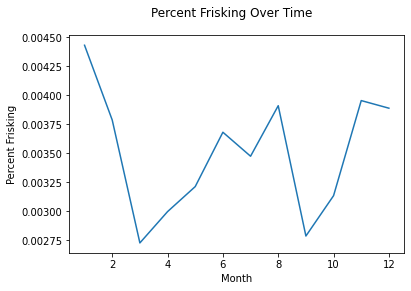

In [52]:
import matplotlib.pyplot as plt
plt.plot(monthly_frisk)
plt.xlabel('Month')
plt.ylabel('Percent Frisking')
plt.suptitle('Percent Frisking Over Time')
plt.show()

In [53]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
date_and_time
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


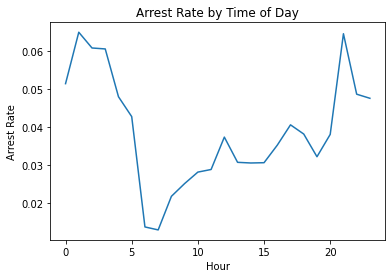

In [54]:
# Create a line plot of 'hourly_arrest_rate'
plt.plot(hourly_arrest_rate)

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

### Are Drug Related Stops on the Rise?
Resampling, changing frequency of time series operations.

In [55]:
monthly_frisk = ri.frisk.resample('M').mean()
monthly_frisk

date_and_time
2005-01-31    0.000000
2005-02-28    0.000000
2005-03-31    0.000000
2005-04-30    0.000000
2005-05-31         NaN
                ...   
2015-08-31    0.002326
2015-09-30    0.003390
2015-10-31    0.000000
2015-11-30    0.000000
2015-12-31    0.003636
Freq: M, Name: frisk, Length: 132, dtype: float64

In [56]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()


date_and_time
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


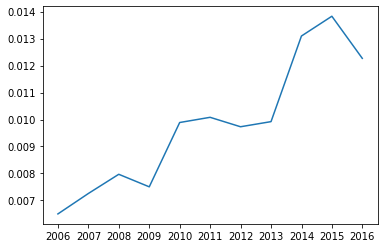

In [57]:
# Create a line plot of 'annual_drug_rate'
plt.plot(annual_drug_rate)

# Display the plot
plt.show()

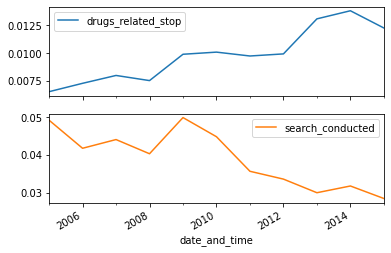

In [58]:

# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('a').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

### What Violations are Caught in Each District?

In [59]:
#Computing a frequency table with .crosstab()
table = pd.crosstab(ri.driver_race,
            ri.driver_gender)
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [60]:
table = table.loc['Asian':'Hispanic']
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


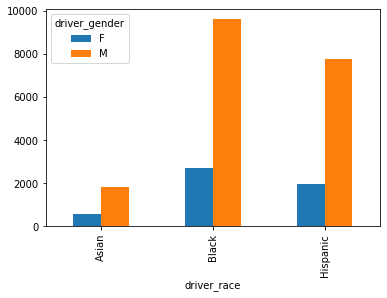

In [61]:
# Basic bar plot
table.plot(kind='bar')
plt.show()

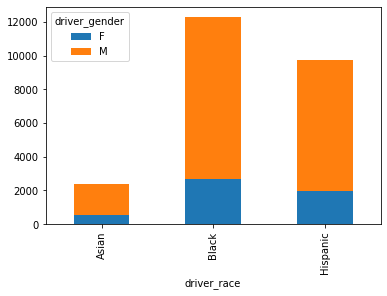

In [62]:
# Stacked Bar Plot
table.plot(kind='bar', stacked=True)
plt.show()

In [63]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322
Zone X1          296               671  ...         74      1119
Zone X3         2049              3086  ...        820      8779
Zone X4         3541              5353  ...        843      9795

[6 rows x 6 columns]
violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322

[3 rows x 6 columns]


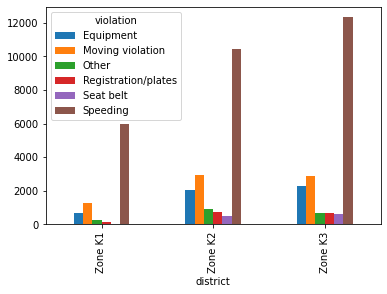

In [64]:

# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

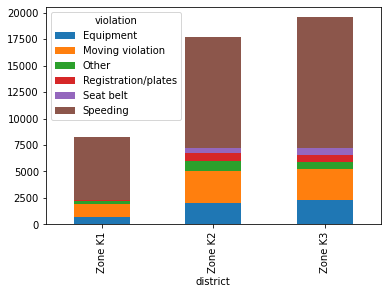

In [65]:

# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar',stacked=True)

# Display the plot
plt.show()

### How Long Might You be Stopped for a Violation

In [66]:
# Mapping with a dictionary to change values in a column
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min' : 8,'16-30 Min' : 23,'30+ Min' : 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


In [0]:
search_rate = ri.groupby('violation').search_conducted.mean()

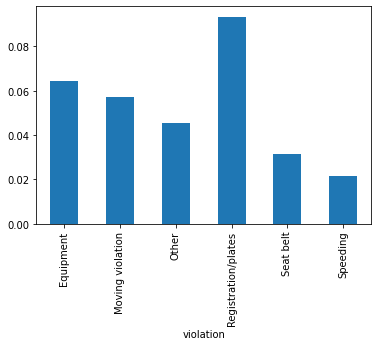

In [68]:
search_rate.plot(kind='bar')
plt.show()

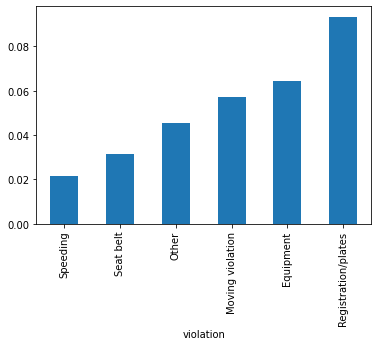

In [69]:
search_rate.sort_values().plot(kind='bar') # chaining plot() makes it so inplace=True is not necessary
plt.show()

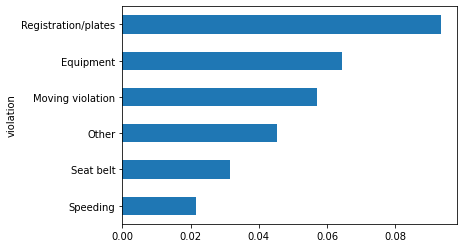

In [70]:
search_rate.sort_values().plot(kind='barh') 
plt.show()

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


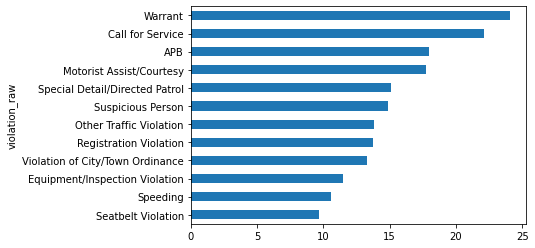

In [71]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

# Analyzing the Effect of Weather on Policing
### Exploring the Weather Dataset

In [187]:
weather = pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [188]:
weather[['AWND','WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


In [189]:
weather[['AWND','WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


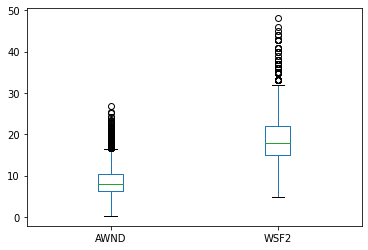

In [190]:
weather[['AWND','WSF2']].plot(kind='box')
plt.show()

In [191]:
weather['wdiff'] = weather.WSF2 - weather.AWND 
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,wdiff
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.15
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,4.70
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,10.07
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9.17
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,9.17


In [192]:
weather.shape

(4017, 28)

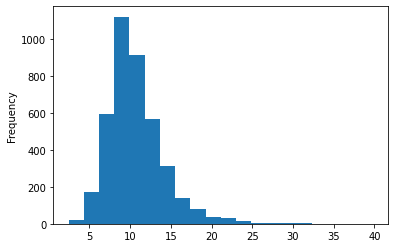

In [193]:
weather.wdiff.plot(kind='hist',bins=20)
plt.show()

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


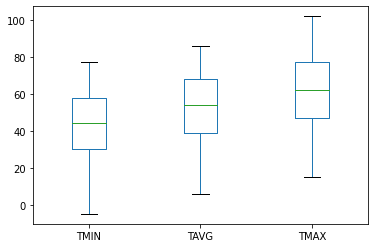

In [194]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('weather.csv')

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


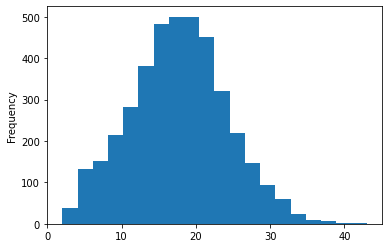

In [195]:

# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

### Categorizing the Weather

In [0]:
temp = weather.loc[:,'TAVG':'TMAX']

In [197]:
temp.shape

(4017, 3)

In [198]:
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


In [199]:
# sum each column
temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

In [200]:
# sum each row
temp.sum(axis=1)

0       132.0
1       108.0
2       146.0
3       126.0
4       107.0
        ...  
4012    156.0
4013    114.0
4014    101.0
4015     92.0
4016    124.0
Length: 4017, dtype: float64

In [201]:
ri.head()

,date_and_time,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04 12:55:00,RI,2005/01/04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23 23:15:00,RI,2005/01/23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17 04:15:00,RI,2005/02/17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20 17:15:00,RI,2005/02/20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24 01:20:00,RI,2005/02/24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [202]:
# Mapping stop length
mapping = {'0-15 Min': 'short','16-30 Min':'medium','30-45 Min':'long'}
ri['stop_length'] = ri.stop_duration.map(mapping)
ri.head(3)

,date_and_time,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_length
0,2005-01-04 12:55:00,RI,2005/01/04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,short
1,2005-01-23 23:15:00,RI,2005/01/23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,short
2,2005-02-17 04:15:00,RI,2005/02/17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,short


In [203]:
ri.stop_length.value_counts()

short     69577
medium    13740
Name: stop_length, dtype: int64

In [204]:
ri.stop_length.memory_usage(deep=True)

7337098

In [205]:
# Change column to category for more efficient storage,and to allow order to be assigned to values
from pandas.api.types import CategoricalDtype
cats = ['short','medium','long'] # Creates logical order to values
ri['stop_length'] = ri.stop_length.astype(CategoricalDtype(categories=cats, ordered=True)) # Have to pass in CategoricalDtype not 'category'
ri.stop_length.dtype

CategoricalDtype(categories=['short', 'medium', 'long'], ordered=True)

In [206]:
ri.stop_length.memory_usage(deep=True)

86982

In [207]:
ri.stop_length.head()

0     short
1     short
2     short
3    medium
4     short
Name: stop_length, dtype: category
Categories (3, object): [short < medium < long]

In [208]:
# can filter with comoparison operators now
ri[ri.stop_length > 'short'].head()

,date_and_time,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_length
3,2005-02-20 17:15:00,RI,2005/02/20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,medium
46,2005-10-01 22:40:00,RI,2005/10/01,22:40,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone K2,medium
47,2005-10-01 22:40:00,RI,2005/10/01,22:40,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone K2,medium
52,2005-10-02 02:10:00,RI,2005/10/02,02:10,F,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone K2,medium
53,2005-10-02 02:11:00,RI,2005/10/02,02:11,F,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone K2,medium


In [209]:
ri['is_arrested'] = ri['is_arrested'].astype('bool')
ri.is_arrested.dtype

dtype('bool')

In [210]:
ri.groupby('stop_length').is_arrested.mean()

stop_length
short     0.013654
medium    0.093595
long           NaN
Name: is_arrested, dtype: float64

In [211]:
ri.stop_length.value_counts()

short     69577
medium    13740
long          0
Name: stop_length, dtype: int64

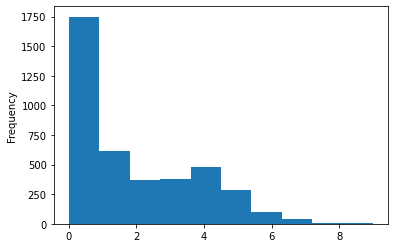

In [212]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

In [213]:

# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


### Merging Data Sets

In [214]:
ri.head(2)

,date_and_time,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_length
0,2005-01-04 12:55:00,RI,2005/01/04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,short
1,2005-01-23 23:15:00,RI,2005/01/23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,short


In [215]:
ri.reset_index(inplace=True)
ri.head(2)

,index,date_and_time,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_length
0,0,2005-01-04 12:55:00,RI,2005/01/04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,short
1,1,2005-01-23 23:15:00,RI,2005/01/23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,short


In [216]:
weather.head(2)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2,bad
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16,2,bad


In [217]:
weather2 = weather[['DATE','rating']]
weather2.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


In [224]:
ri_weather = ri.join(weather2,  how='left') # Why is merge not working? .join() worked go figure
# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('date_and_time', inplace=True)
ri_weather.head(3)

,index,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_length,DATE,rating
date_and_time,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,0,RI,2005/01/04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,short,2005-01-01,bad
2005-01-23 23:15:00,1,RI,2005/01/23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,short,2005-01-02,bad
2005-02-17 04:15:00,2,RI,2005/02/17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,short,2005-01-03,bad


In [220]:
ri_weather.dtypes

index                    int64
state                   object
stop_date               object
stop_time               object
driver_gender           object
driver_race             object
violation_raw           object
violation               object
search_conducted          bool
search_type             object
stop_outcome            object
is_arrested               bool
stop_duration           object
drugs_related_stop        bool
district                object
stop_length           category
DATE                    object
rating                  object
dtype: object

In [165]:
ri_weather.isnull().sum()

date_and_time             0
state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
DATE                  86536
rating                86536
dtype: int64

### Does Weather Affect Arrest Rate?

In [226]:
# Multi index series
search_rate = ri.groupby(['violation',
                          'driver_gender']).search_conducted.mean()

search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [227]:
# When working with multi index series, think of outer index as rows and inner index as columns
search_rate.loc['Equipment']

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

In [228]:
search_rate.loc['Equipment','M']

0.07149643705463182

In [232]:
# Use unstack() to create dataframe
two_d = search_rate.unstack()
two_d

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [234]:
type(two_d)

pandas.core.frame.DataFrame

In [237]:
# Or you can use a pivot table
pivot = ri.pivot_table(index='violation', columns='driver_gender', values='search_conducted') # mean is default for pivot table
pivot

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [239]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())
print()
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())
print()
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

0.0355690117407784

rating
bad      0.062092
good     0.055460
worse    0.069444
Name: is_arrested, dtype: float64

violation            rating
Equipment            bad       0.181818
                     good      0.101010
                     worse     0.291667
Moving violation     bad       0.144000
                     good      0.129032
                     worse     0.188679
Other                bad       0.406250
                     good      0.217391
                     worse     0.307692
Registration/plates  bad       0.193548
                     good      0.196970
                     worse     0.375000
Speeding             bad       0.022611
                     good      0.027252
                     worse     0.009202
Name: is_arrested, dtype: float64


In [240]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc[:, 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate)

violation            rating
Equipment            bad       0.181818
                     good      0.101010
                     worse     0.291667
Moving violation     bad       0.144000
                     good      0.129032
                     worse     0.188679
Other                bad       0.406250
                     good      0.217391
                     worse     0.307692
Registration/plates  bad       0.193548
                     good      0.196970
                     worse     0.375000
Speeding             bad       0.022611
                     good      0.027252
                     worse     0.009202
Name: is_arrested, dtype: float64
violation
Equipment              0.181818
Moving violation       0.144000
Other                  0.406250
Registration/plates    0.193548
Speeding               0.022611
Name: is_arrested, dtype: float64
violation            rating
Equipment            bad       0.181818
                     good      0.101010
                     worse

In [241]:
# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.144


In [242]:
# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
bad      0.022611
good     0.027252
worse    0.009202
Name: is_arrested, dtype: float64


In [243]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                    bad      good     worse
violation                                        
Equipment            0.181818  0.101010  0.291667
Moving violation     0.144000  0.129032  0.188679
Other                0.406250  0.217391  0.307692
Registration/plates  0.193548  0.196970  0.375000
Speeding             0.022611  0.027252  0.009202
rating                    bad      good     worse
violation                                        
Equipment            0.181818  0.101010  0.291667
Moving violation     0.144000  0.129032  0.188679
Other                0.406250  0.217391  0.307692
Registration/plates  0.193548  0.196970  0.375000
Speeding             0.022611  0.027252  0.009202
